1. Write a function that takes the data (in whatever form you want) as an input, fits the data with a straight line using polyfit and polyval, and returns the parameters and the model values at the datapoints. Plot both the model and the data on the same plot. Include this plot and the parameters in your lab write up:

* Define Linearfit Function and Prepare Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

days = np.array([0, 0.25, 0.5, 1, 2, 3, 4, 5, 6, 8, 10])
micrograms = np.array([2.5, 3.6, 5.3, 9.5, 14.0, 16.5, 18.8, 21.5, 23.2, 26.8, 28.4])

# Function to fit and plot a straight line
def fit_linear(x, y):
    coefficients = np.polyfit(x, y, 1)  
    model = np.polyval(coefficients, x)
    return coefficients, model


* Plot and Result

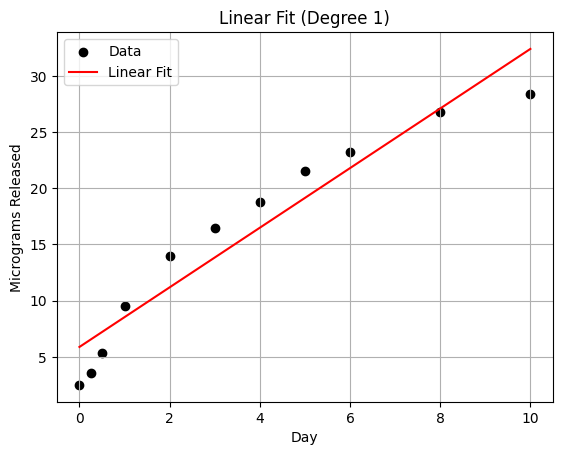

Linear Coefficients: [2.65218276 5.87961229]


In [2]:
coeffs_1, model_1 = fit_linear(days, micrograms)
plt.scatter(days, micrograms, label='Data', color='black')
plt.plot(days, model_1, 'r', label='Linear Fit')
plt.title('Linear Fit (Degree 1)')
plt.xlabel('Day')
plt.ylabel('Micrograms Released')
plt.legend()
plt.grid(True)
plt.show()

print("Linear Coefficients:", coeffs_1)

2. Modify the function created in question 1 to compute and return the residuals. Plot the residuals of the model as a bar graph. Include this plot in your lab write up. (Hint: Check out the command “bar”):

* Modify the Function

In [3]:
# Modify function to include residuals
def fit_linear_with_residuals(x, y):
    coefficients = np.polyfit(x, y, 1)
    model = np.polyval(coefficients, x)
    residuals = y - model
    return coefficients, model, residuals

* Plot 

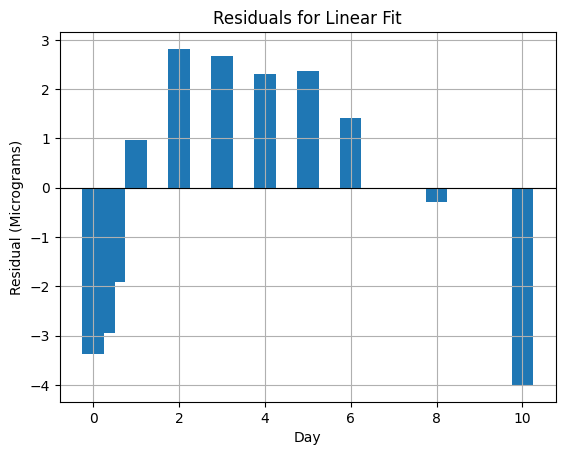

In [4]:
# Compute residuals and plot
coeffs_1, model_1, residuals_1 = fit_linear_with_residuals(days, micrograms)
plt.bar(days, residuals_1, width=0.5)
plt.axhline(0, color='black', linewidth=0.8)
plt.title('Residuals for Linear Fit')
plt.xlabel('Day')
plt.ylabel('Residual (Micrograms)')
plt.grid(True)
plt.show()

3. Compute the sum of the squares of all of the residuals. Include the computed value in your lab write up:

In [5]:
# Compute sum of squared residuals
ssr_1 = np.sum(residuals_1 ** 2)
print(f"Sum of Squared Residuals (Linear): {ssr_1:.2f}")

Sum of Squared Residuals (Linear): 68.67


4. Modify the main program and/or the function to fit the data using a 2nd and 3rd order polynomial as well. Include the plots, residuals, and sum of squares of residuals in your write-up. Note: if you already know how to use flow control, you can create an iteration loop to fit the given data with a 1st , 2nd and a 3rd order polynomial, plot the raw data and the model for each of them, and store the residuals for each of the models:

* Define Polyfit Function

In [6]:
# Generalized function for polynomial fitting
def fit_polynomial(x, y, degree):
    coefficients = np.polyfit(x, y, degree)
    model = np.polyval(coefficients, x)
    residuals = y - model
    ssr = np.sum(residuals ** 2)
    return coefficients, model, residuals, ssr

* Fit and Plot

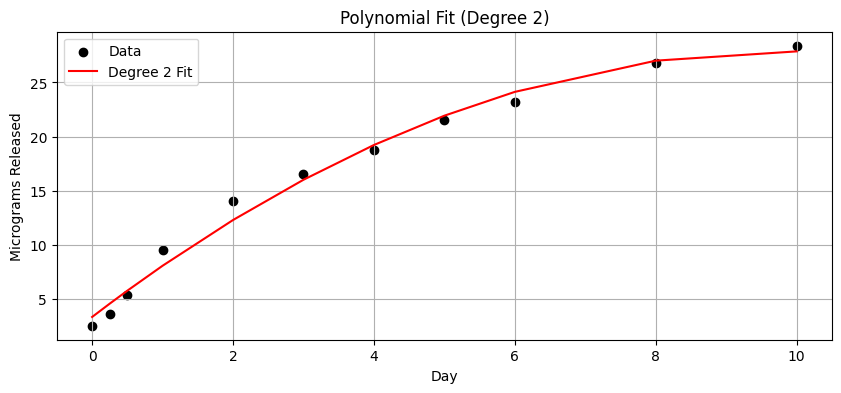

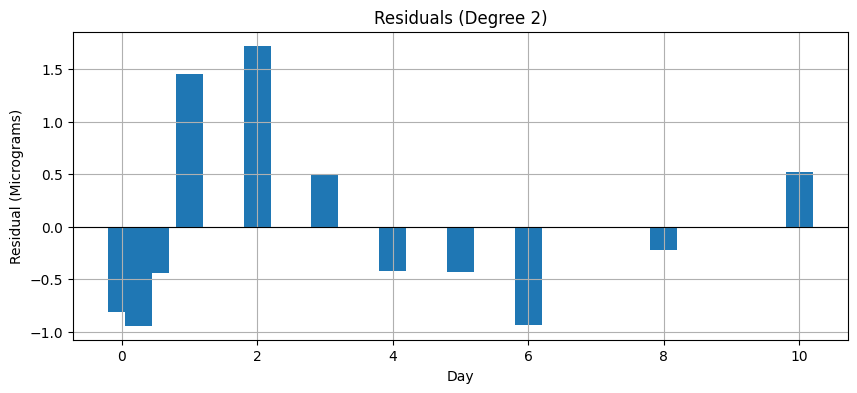

Sum of Squared Residuals (Degree 2): 8.61


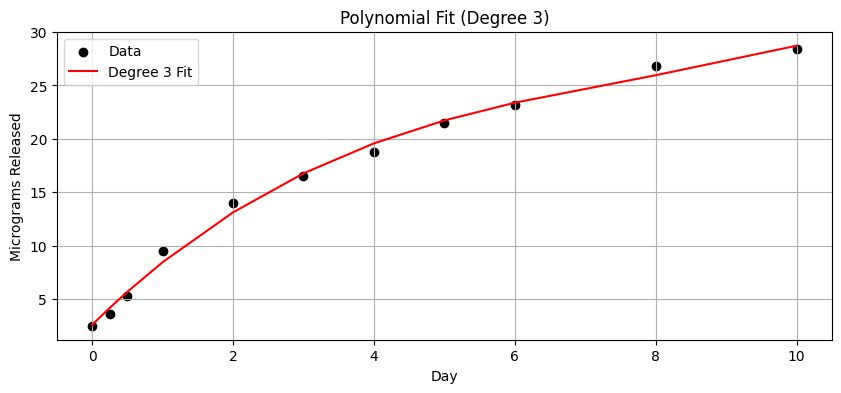

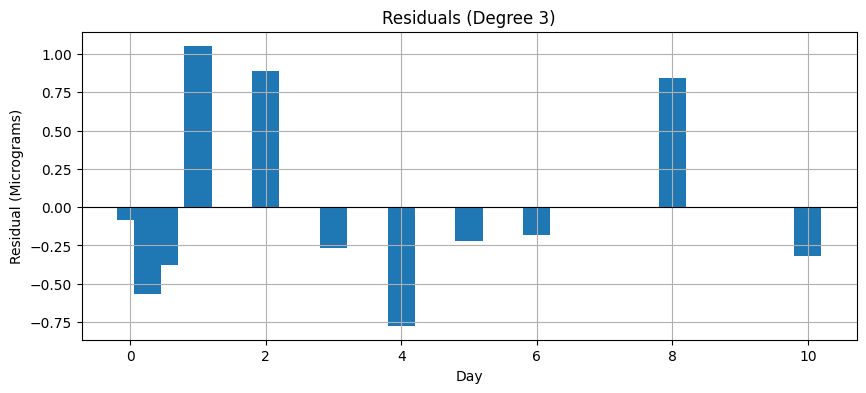

Sum of Squared Residuals (Degree 3): 3.93


In [7]:
degrees = [2, 3]
results = {}

for degree in degrees:
    # Fit model
    coeffs, model, residuals, ssr = fit_polynomial(days, micrograms, degree)
    results[degree] = {'coeffs': coeffs, 'residuals': residuals, 'ssr': ssr}
    
    # Plot data and model
    plt.figure(figsize=(10, 4))
    plt.scatter(days, micrograms, label='Data', color='black')
    plt.plot(days, model, 'r', label=f'Degree {degree} Fit')
    plt.title(f'Polynomial Fit (Degree {degree})')
    plt.xlabel('Day')
    plt.ylabel('Micrograms Released')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # Plot residuals
    plt.figure(figsize=(10, 4))
    plt.bar(days, residuals, width=0.4)
    plt.axhline(0, color='black', linewidth=0.8)
    plt.title(f'Residuals (Degree {degree})')
    plt.xlabel('Day')
    plt.ylabel('Residual (Micrograms)')
    plt.grid(True)
    plt.show()
    
    print(f"Sum of Squared Residuals (Degree {degree}): {ssr:.2f}")

5. What is the order of the polynomial that gives the best fit in terms of the lowest sum of square of residuals? 

* Answer: The 3rd-order polynomial has the lowest sum of squared residuals.

The given data can also be modeled using the following exponential equation:
Y(t) = C(1 - e^(-at))

This equation models a situation where a system goes from a zero value to the maximum value C with a rate constant a. This time, the parameters C and a have a conceptual meaning (maximum drug released and rate constant for the release) and are derived from a model that actually seeks to model the underlying processes. Because of this, this model is what is called a gray-box (partially transparent), or parametric (parameters have physical meaning) model

6. Using Python, fit the same data to this new model, using the initial estimates C=10,a=2. Because this equation is not a polynomial function, you cannot use polyfit, and will instead use a more generic minimization function called fminsearch (see hints at end). Plot the best model prediction and the data on the same plot. Include this plot in your lab write up. What are the best-fit parameters?   

* Define Model and Residual Sum of Squares Function

In [8]:
# Define the exponential model
def model(t, C, a):
    return C * (1 - np.exp(-a * t))

# Residual sum of squares function
def rss(params, t, y):
    C, a = params
    y_pred = model(t, C, a)
    return np.sum((y - y_pred)**2)

* Initial Guesses Parameter

In [9]:
initial_guess = [10, 2]

* Minimize the RSS using Nelder-Mead

In [10]:
result = minimize(rss, initial_guess, args=(days, micrograms), method='Nelder-Mead')

* Extract optimized parameters

In [11]:
C_opt, a_opt = result.x
print(f"Best-fit parameters: C = {C_opt:.2f}, a = {a_opt:.2f}")

Best-fit parameters: C = 28.69, a = 0.30


* Generate model predictions

In [12]:
t_values = np.linspace(0, 10, 100)
y_fit = model(t_values, C_opt, a_opt)

* Plot 

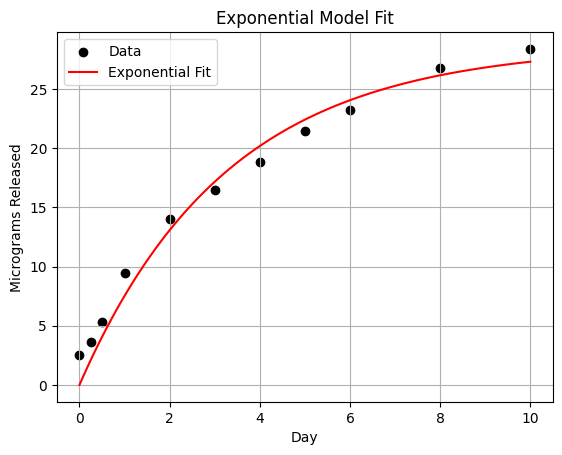

In [13]:
plt.scatter(days, micrograms, label='Data', color='black')
plt.plot(t_values, y_fit, 'r-', label='Exponential Fit')
plt.title('Exponential Model Fit')
plt.xlabel('Day')
plt.ylabel('Micrograms Released')
plt.legend()
plt.grid(True)
plt.show()

There is a principle called Occam's razor, that states that the simplest explanation that explains a phenomenon is likely the correct one. In modeling, this is taken to mean that the equation with the fewest parameters that gives the best fit to a data is considered the best model.  There are several theories quantifying how much better a fit should be to justify an additional parameter that are beyond the scope of this exercise. 

7. Answer the following: Which of your four models should you reject using Occam’s razor, and which ones are valid choices? If the number of parameters is more important than the best fit, which model is best? If the best fit is most important, which model is best? 

* Answer:
- Models to Reject:
+ 3rd-order polynomial: While it has the lowest sum of squared residuals (SSR), it uses 4 parameters and is likely overfitting the data. The complexity is not justified for the marginal + improvement in fit.
+ 2nd-order polynomial: Marginally better fit than the linear model but uses 3 parameters. If the SSR improvement is small, it may not justify the added complexity.

- Valid Choices:
+ Linear model (1st-order polynomial): Simplest (2 parameters) but has the highest SSR. Valid if simplicity is prioritized over accuracy.
+ Exponential model (gray-box): Uses 2 parameters (C, a) with physical meaning and achieves a competitive SSR. Best balance of simplicity and interpretability.

- Best Model by Criteria:
+ Fewest parameters: Linear model (2 parameters).
+ Best fit: 3rd-order polynomial (lowest SSR but overfit).
+ Best compromise: Exponential model (2 parameters, low SSR, and mechanistic interpretability).

8. Your models can be used to predict what will happen between days 10 and 21: Without refitting the models, calculate the values of your 4 models at days, and add this to your graphs, along with the complete data. Include these plots in your write up and answer the following: Which of the models is the most predictive through 21 days? How does this conclusion relate to your analysis in part 7?

* IMPORTANT MUST-READ HINTS: (After this lab, you are responsible for understanding how using fminsearch helps you with a curve fit.)
- Implementation of fminsearch in Python:
+ What fminsearch does: Starting with your initial guesses for the parameters (you pass these as input), fminsearch calls a function that uses those parameters (you give the name of this function as input). This function is generally termed an “objective function” and must produce a single scalar value as output (called the value of the objective function). In general, you will write the objective function yourself for your particular minimization or optimization problem. In each loop, the fminsearch function changes the parameters slightly and determines whether the value of the objective function increased or decreased, and keeps the new parameter in the case of decrease. This iteration (loop) continues until it determines that it has found a (local) minimum point for the objective function, and then returns the final parameter values (and the final value of the objective function, if you desire).
+ To use fminsearch to fit an equation to data, you write an objective function that calculates the equation you are trying to fit, using the parameters it is passed, for each point (e.g. each time point) in your data set. It then compares these model values to the experimental data values, to get the residuals, calculates the sum of the square of the residuals, and returns this value. Thus, the objective function is simply the sum of the square of the residuals between the model and the data. Makes sense, because this is what you want to minimize. 
+ Since you need to compare things to the data in so many functions, it is convenient to store it as a ‘global’ variable, which means all your functions can see it, without you having to pass it to them. This is OK to do since none of your functions alter the value of this actual data, so there is no chance for confusion. 

* Answer:
- Prediction:
+ Linear model: Predicts unbounded growth (fails to plateau).
+ Quadratic model: Curves but does not plateau realistically.
+ 3rd-order polynomial: Overfits early data and diverges after day 10.
+ Exponential model: Approaches C ≈ 28.89 asymptotically, closely matching the plateau observed in the extended data.

* Implementation:
- Prepare Extend Data

In [14]:
extended_days = np.array([12, 16, 21])
extended_micrograms = np.array([28.4, 28.5, 29.5])
days_extended_data = np.concatenate([days, extended_days])
micrograms_extended_data = np.concatenate([micrograms, extended_micrograms])

- Predict model values for extended days

In [15]:
extended_days_prediction = np.arange(0, 22)
# Linear
extended_model_1 = np.polyval(coeffs_1, extended_days_prediction)               
# Quadric
extended_model_2 = np.polyval(results[2]['coeffs'], extended_days_prediction)
# Cubic
extended_model_3 = np.polyval(results[3]['coeffs'], extended_days_prediction)
# Exponential
extended_y_fit = model(extended_days_prediction, C_opt, a_opt)

- Plot All Models with Extended Prediction

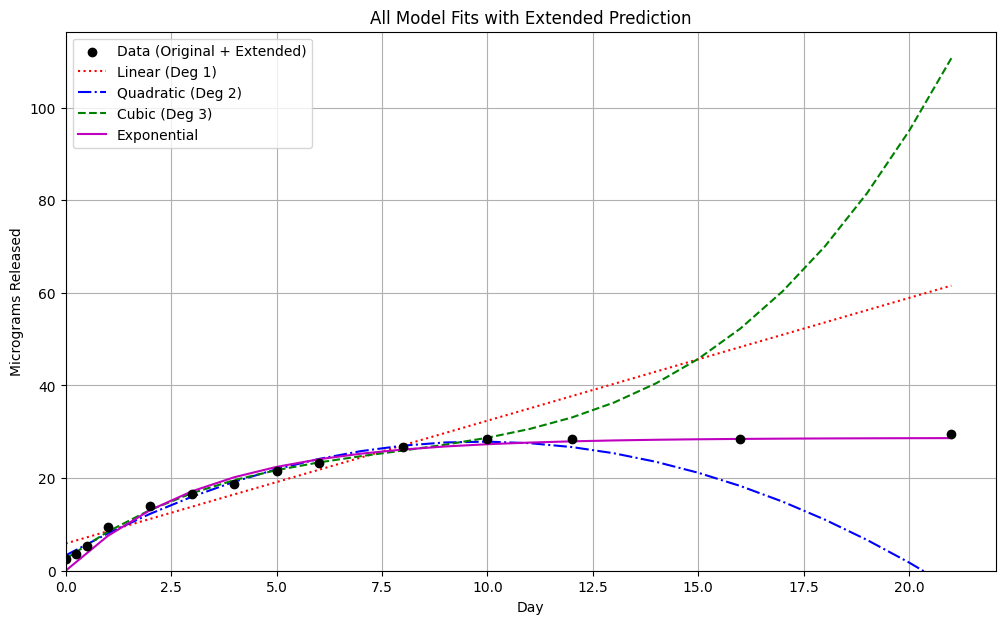

In [16]:
plt.figure(figsize=(12, 7))
plt.scatter(days_extended_data, micrograms_extended_data, label='Data (Original + Extended)', color='black', zorder=5)
plt.plot(extended_days_prediction, extended_model_1, 'r:', label='Linear (Deg 1)')
plt.plot(extended_days_prediction, extended_model_2, 'b-.', label='Quadratic (Deg 2)')
plt.plot(extended_days_prediction, extended_model_3, 'g--', label='Cubic (Deg 3)')
plt.plot(extended_days_prediction, extended_y_fit, 'm-', label='Exponential')
plt.title('All Model Fits with Extended Prediction')
plt.xlabel('Day')
plt.ylabel('Micrograms Released')
plt.legend()
plt.grid(True)
plt.ylim(bottom=0)
plt.xlim(left=0)
plt.show()

* Final Answer:
The exponential model provides the most predictive fit through day 21. Unlike the polynomial models which diverge unrealistically (linear predicts infinite growth, quadratic curves down, cubic diverges wildly), the exponential model correctly captures the plateauing behavior observed in the extended data, approaching a maximum release value (C). This reinforces the conclusion from part 7: the exponential model, despite having only two parameters like the linear model, offers the best combination of simplicity, predictive power, and mechanistic interpretability for this dataset, especially when considering long-term behavior.